#letsGrowMore Datascience Internship
intermediate level task1

###name:Rehan Hudewale
###Data Science Problem statement-Exploratory Data Analysis on Dataset - Terrorism
###Dataset: https://bit.ly/2TK5Xn5
###IDE used:colab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

%matplotlib inline

In [2]:
#Importing the dataset.

data = pd.read_csv("/content/terrorism.csv",encoding ='latin =1')

data

<ipython-input-2-6b8f92701257>:3: DtypeWarning: Columns (4,31,33,76,94,96,114,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/terrorism.csv",encoding ='latin =1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16576,198207150003,1982,7,15,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
16577,198207150004,1982,7,15,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
16578,198207150005,1982,7,15,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
16579,198207150006,1982,7,15,NaN,0,NaN,159,Peru,3,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


<Axes: >

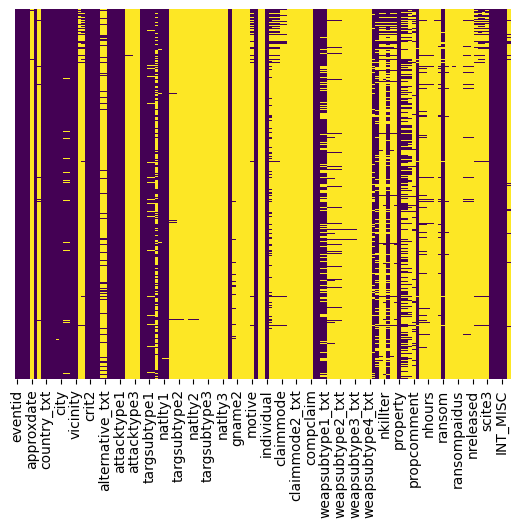

In [4]:
#Cleaning the data, basically we are checking for any Missing value(NAN) and their percentage of missing.

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 17.1+ MB


In [6]:
#Info for the dataframe.

data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.658100e+04,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,15975.000000,15975.000000,16581.000000,...,4.170000e+02,1.0,8.800000e+01,1.0,638.000000,486.000000,16580.000000,16580.000000,16580.000000,16580.000000
mean,1.978029e+11,1977.966045,6.201978,15.155962,0.020445,183.120258,5.524878,27.875821,-28.932087,1.253543,...,3.793429e+06,20000.0,1.351280e+06,0.0,2.888715,8.341564,-3.738118,-3.693667,0.263450,-2.668034
std,3.266916e+08,3.270107,3.415697,8.949768,0.141521,170.441089,3.372000,22.109249,55.936993,0.905089,...,4.932135e+07,NaN,4.853561e+06,NaN,1.280881,28.437426,4.552678,4.601334,0.657961,4.561017
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.976092e+11,1976.000000,3.000000,7.000000,0.000000,69.000000,2.000000,13.692880,-86.600964,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.979051e+11,1979.000000,6.000000,15.000000,0.000000,110.000000,8.000000,35.689125,-6.443767,1.000000,...,0.000000e+00,20000.0,7.050000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.980121e+11,1980.000000,9.000000,23.000000,0.000000,217.000000,8.000000,43.291618,9.991586,1.000000,...,4.150000e+05,20000.0,7.250000e+05,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.982072e+11,1986.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,215.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Corealtion between different entity

data.corr()

<ipython-input-7-518e55326e4c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999874,-0.073447,-0.014073,-0.056763,-0.343004,-0.024912,-0.280651,-0.026098,0.114392,...,0.011431,NaN,-0.125149,NaN,0.072241,0.016154,-0.094943,-0.098444,-0.203957,-0.181606
iyear,0.999874,1.000000,-0.083935,-0.014265,-0.056886,-0.342882,-0.024633,-0.280117,-0.025792,0.114723,...,0.011813,NaN,-0.127657,NaN,0.071925,0.016379,-0.094998,-0.098503,-0.204274,-0.181694
imonth,-0.073447,-0.083935,1.000000,0.006187,0.015787,0.020288,-0.018343,-0.013284,-0.019874,-0.044679,...,-0.035325,NaN,0.205668,NaN,0.026029,-0.020214,0.003717,0.004353,0.045490,0.012840
iday,-0.014073,-0.014265,0.006187,1.000000,-0.000184,0.029959,0.009578,0.015753,0.011642,-0.013854,...,0.005622,NaN,0.010475,NaN,0.069097,-0.019524,0.015512,0.014178,0.017197,0.020345
extended,-0.056763,-0.056886,0.015787,-0.000184,1.000000,-0.068784,-0.021478,-0.079776,-0.014184,0.033455,...,-0.031796,NaN,-0.134267,NaN,-0.098122,0.005261,0.027543,0.035767,0.032835,0.032094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,0.016154,0.016379,-0.020214,-0.019524,0.005261,0.073249,0.128473,0.145909,0.186215,-0.054100,...,0.006199,NaN,-0.039907,NaN,-0.153808,1.000000,-0.004870,-0.005612,0.021751,0.021538
INT_LOG,-0.094943,-0.094998,0.003717,0.015512,0.027543,0.209723,0.137462,0.137264,0.110957,-0.005810,...,0.038078,NaN,-0.048162,NaN,-0.091275,-0.004870,1.000000,0.994732,0.126014,0.809657
INT_IDEO,-0.098444,-0.098503,0.004353,0.014178,0.035767,0.200065,0.138451,0.131992,0.111279,-0.007080,...,0.034261,NaN,-0.043497,NaN,-0.102300,-0.005612,0.994732,1.000000,0.151753,0.811969
INT_MISC,-0.203957,-0.204274,0.045490,0.017197,0.032835,0.391481,0.201449,0.241090,0.159391,-0.059002,...,-0.016789,NaN,0.020799,NaN,-0.017091,0.021751,0.126014,0.151753,1.000000,0.392578


In [8]:
#Columns for the data frame.

data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

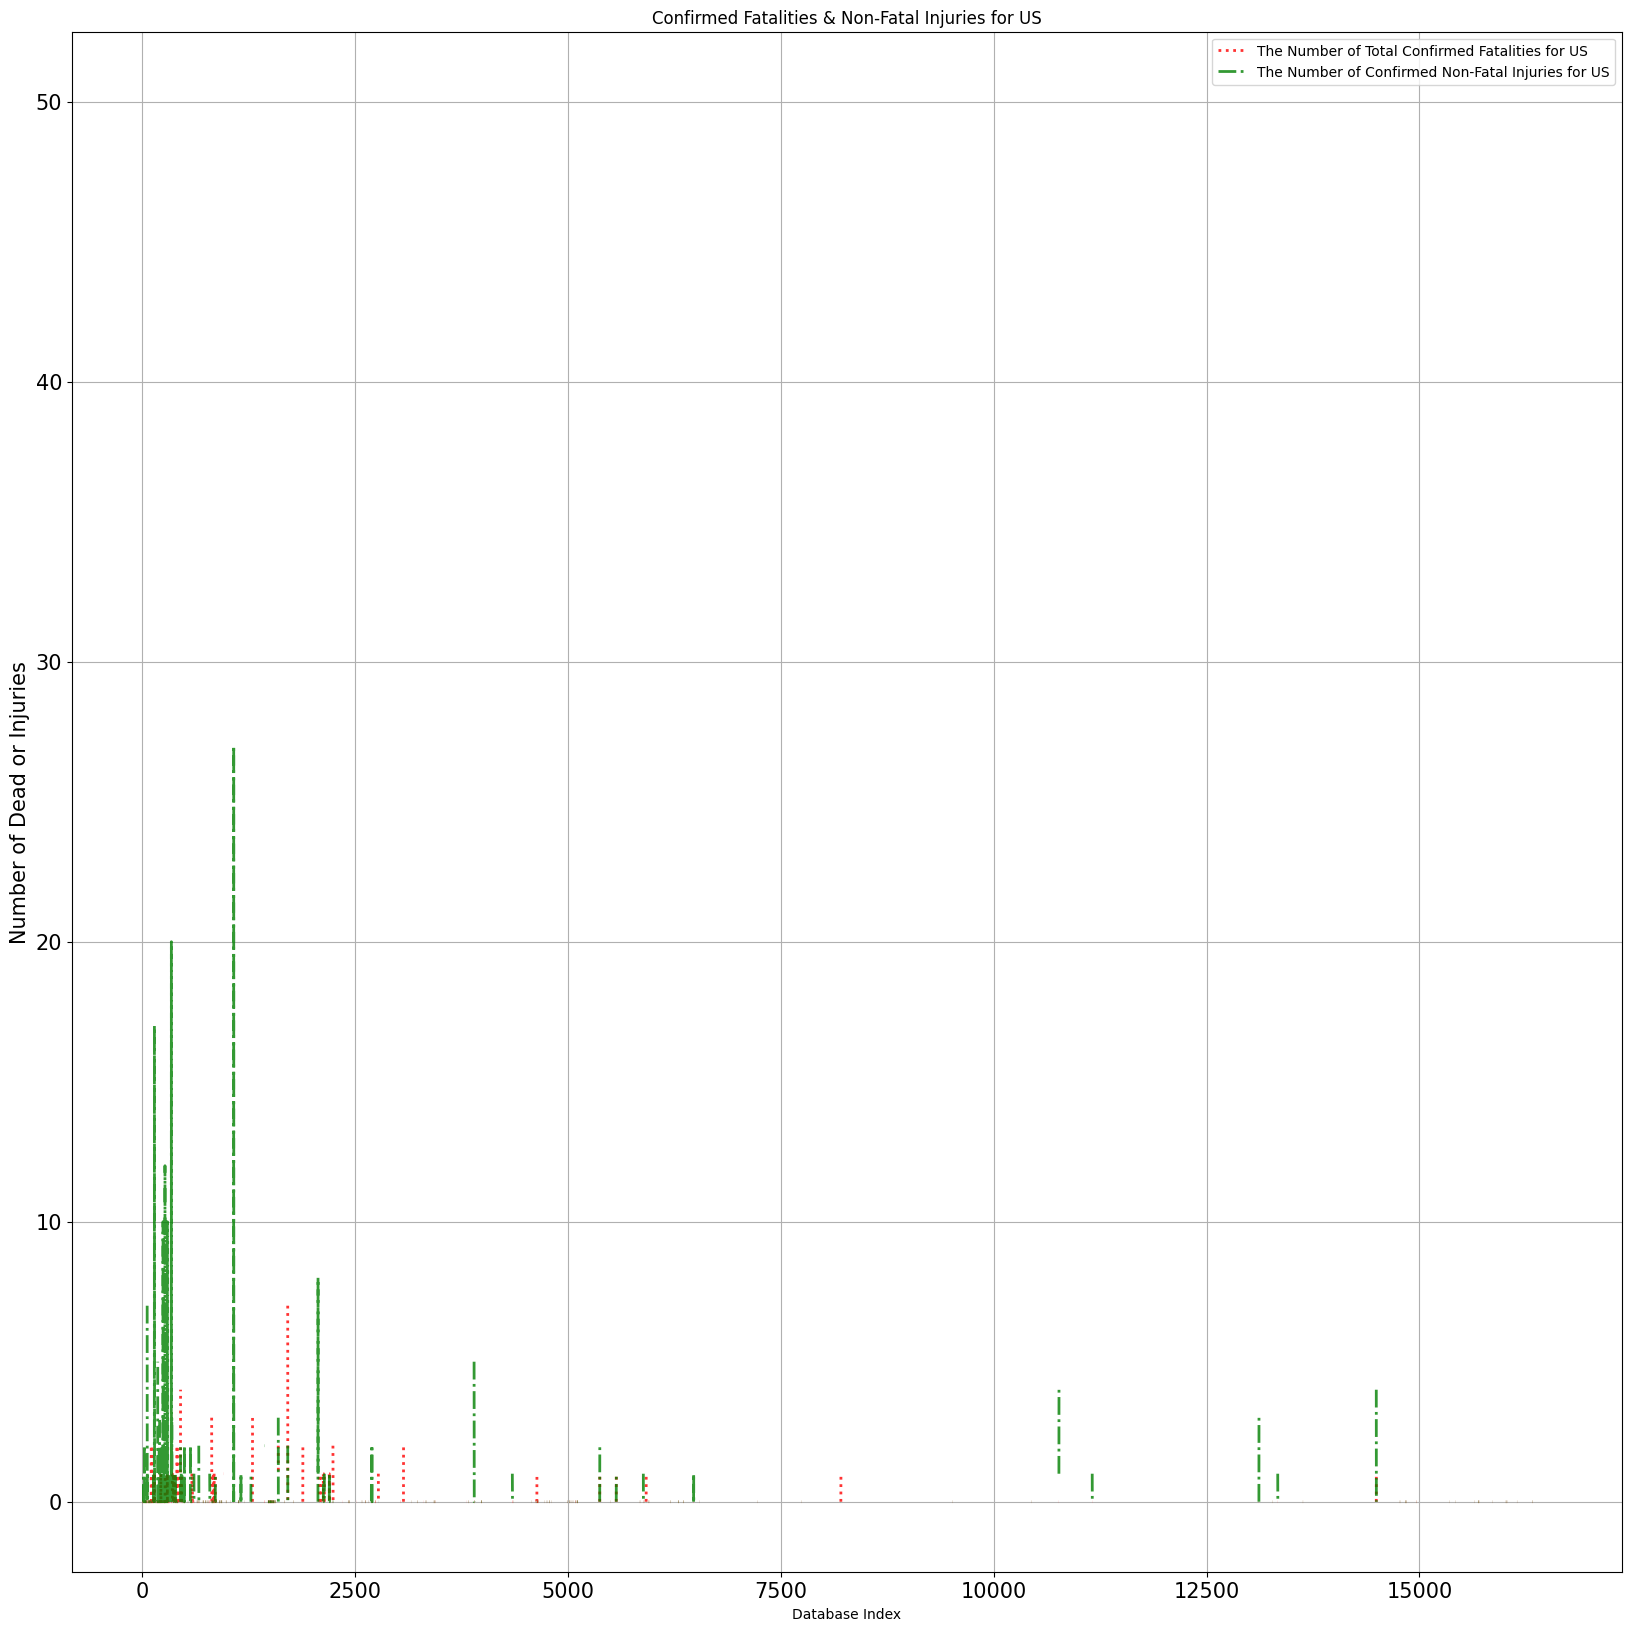

In [9]:
#US TERROR ATTACKS AND DEATH INJURIES
data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True,
                 linestyle = ':', figsize = (20,20), fontsize=15)
data.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True,
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

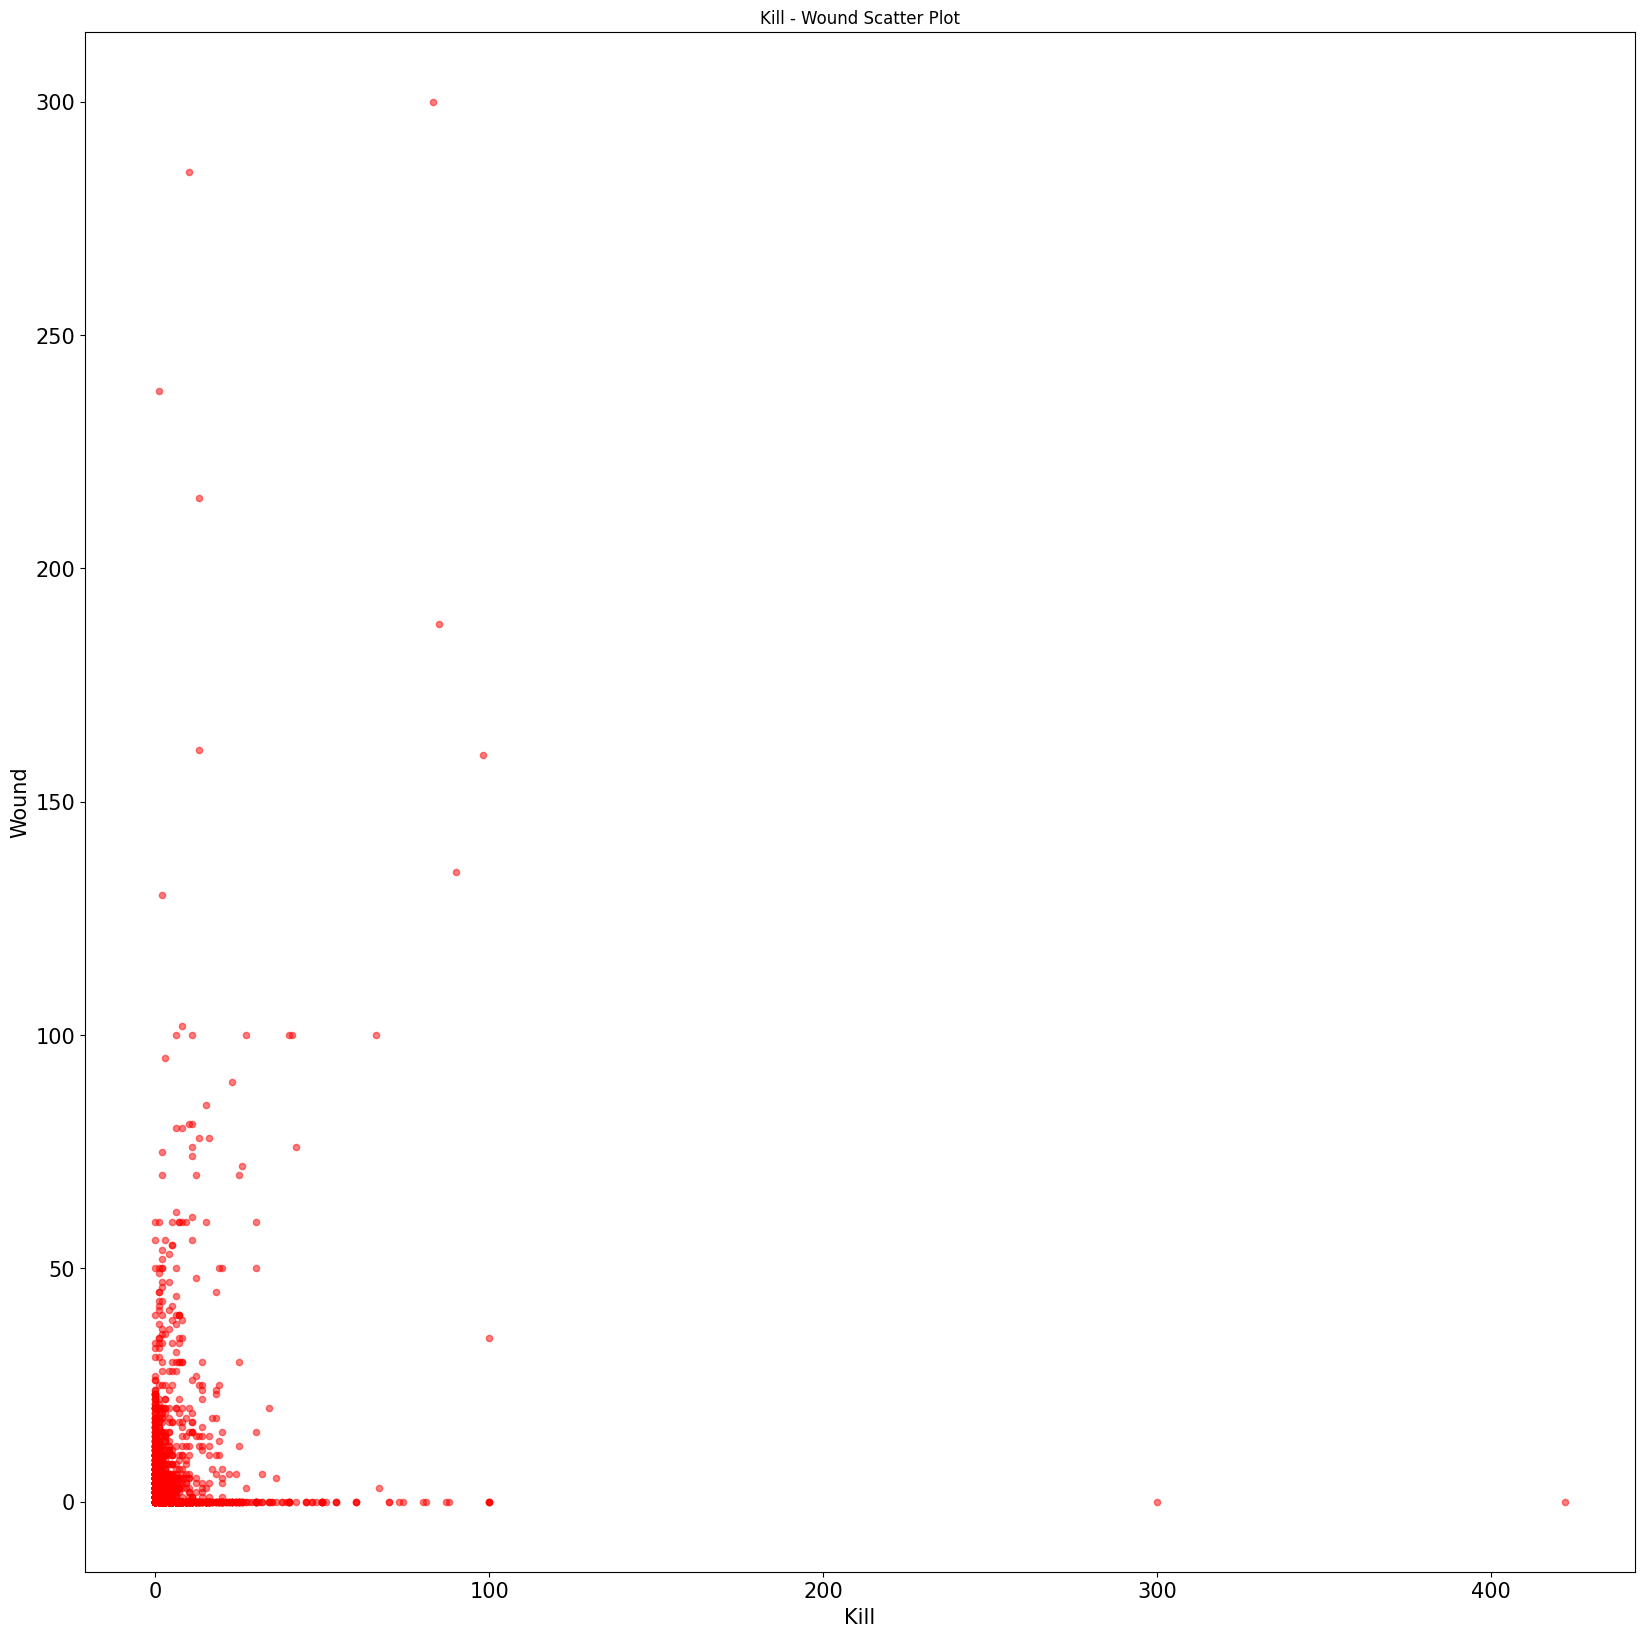

In [10]:
data.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

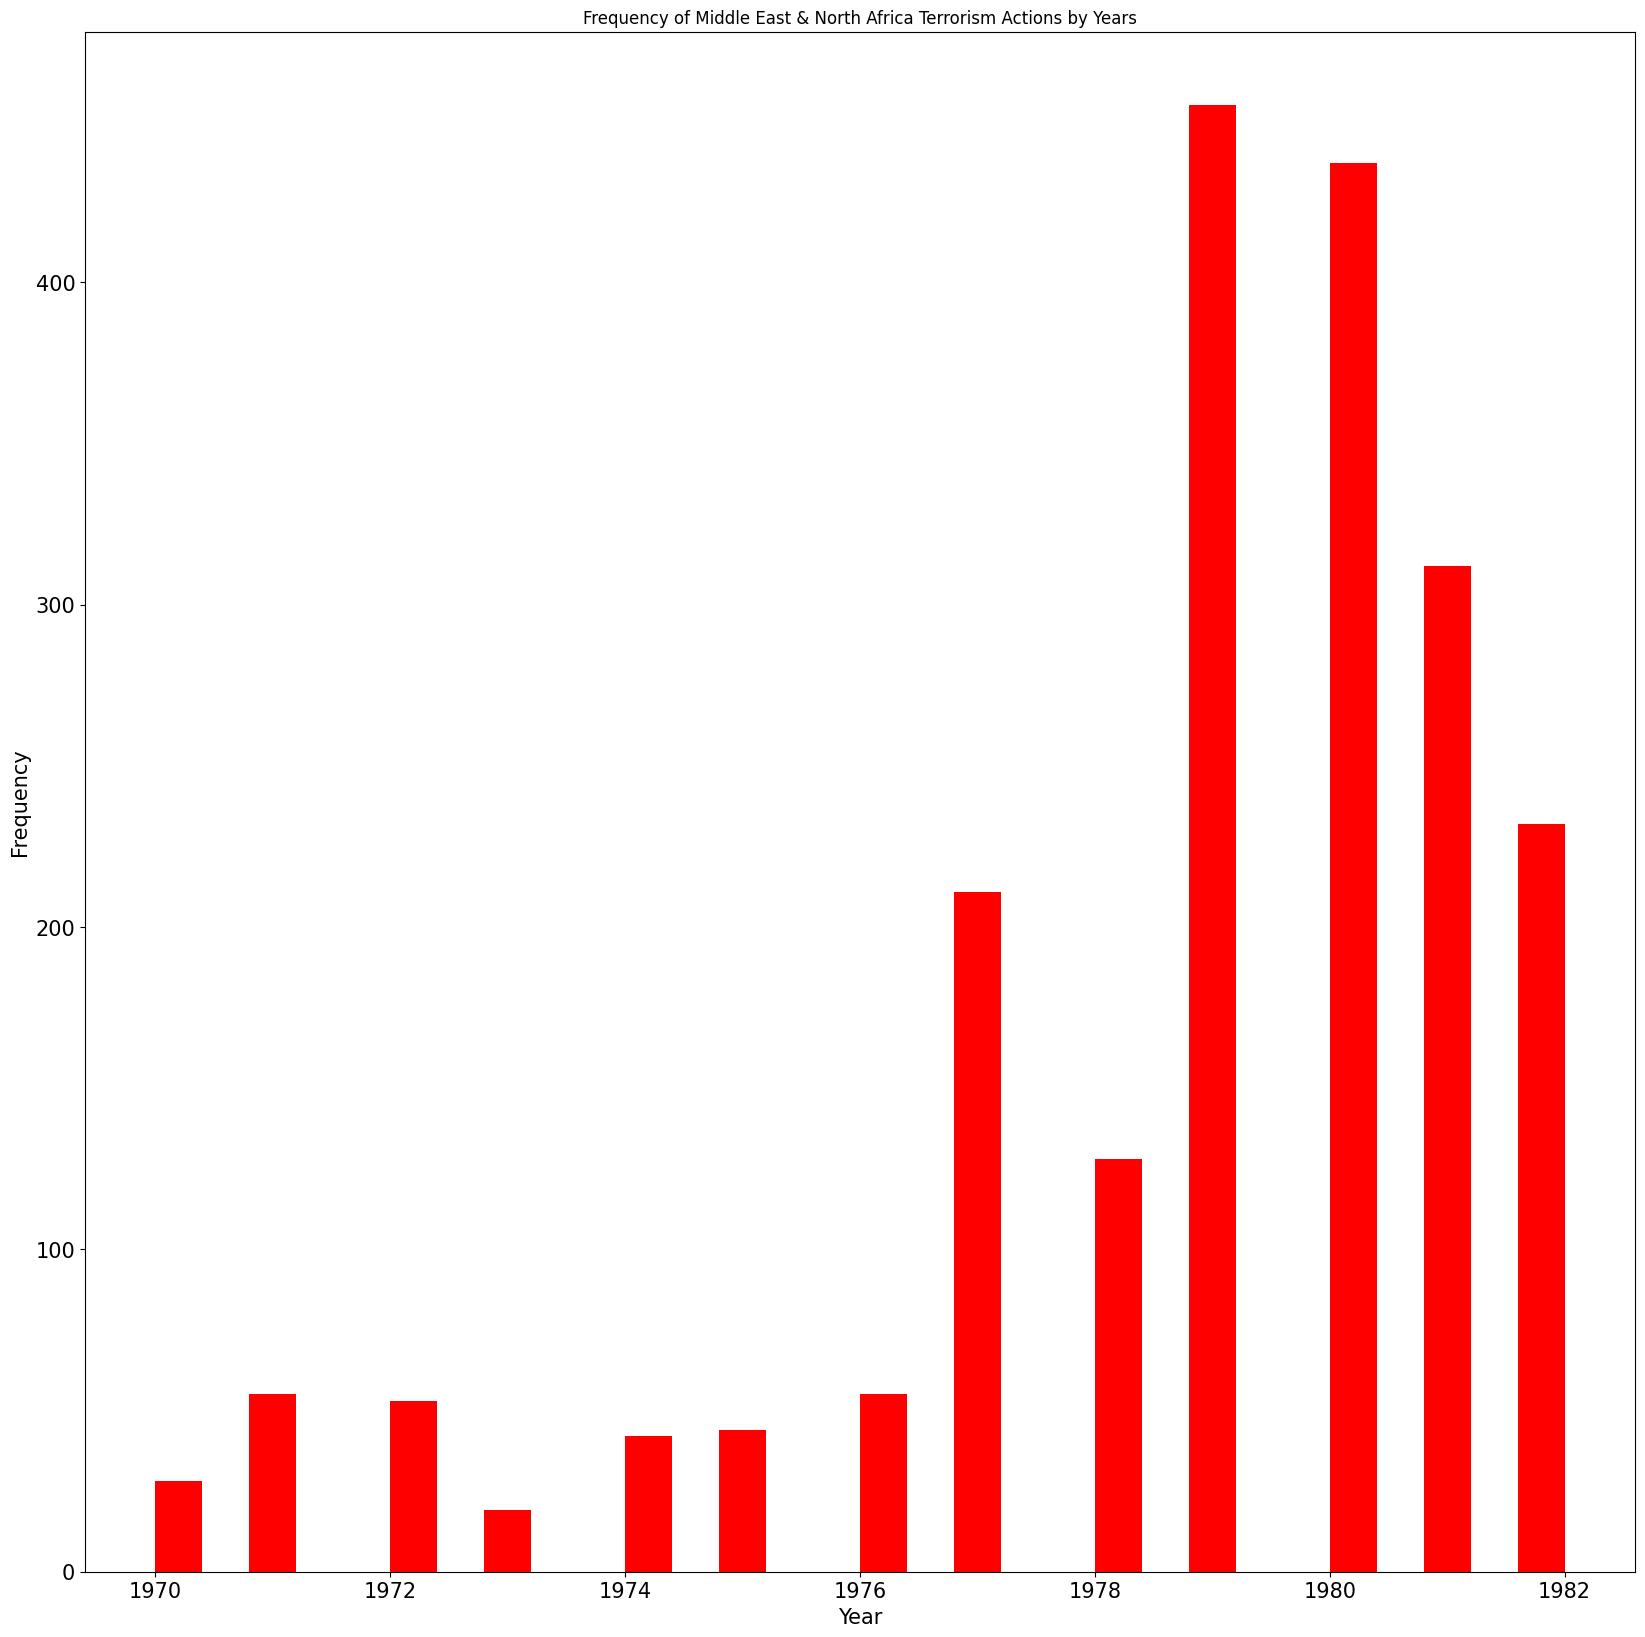

In [11]:
##Frequency of Terrorist Actions in Customized Region
#Let's analyze in Middle East and North Africa

middleEastData = data[data['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

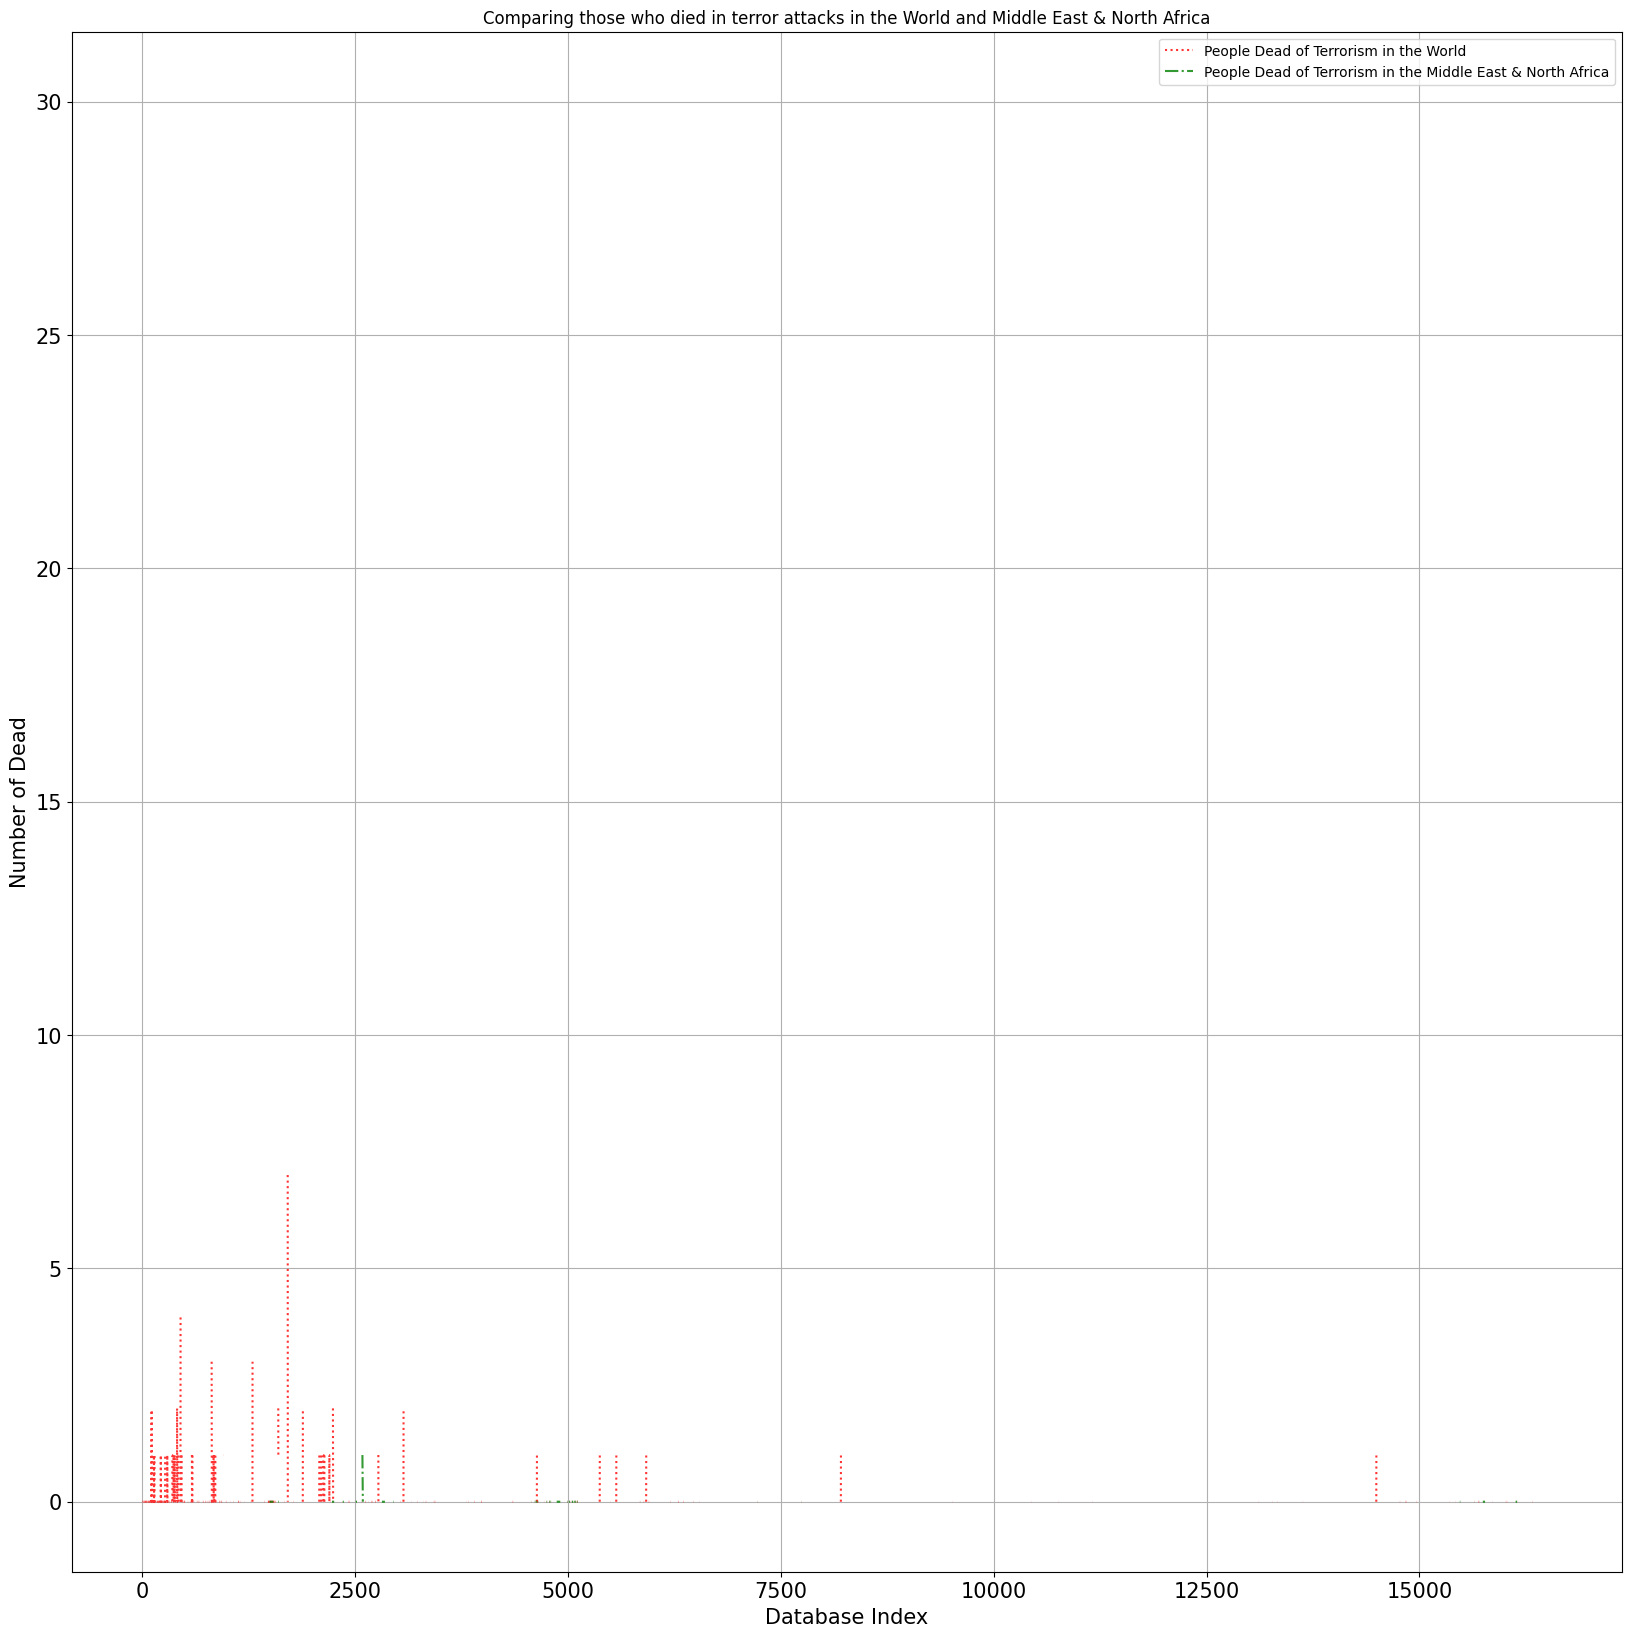

In [12]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True,
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8,
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()


In [13]:
filterYear = data['iyear'] == 1970

In [14]:
filterData = data[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [15]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [16]:
killData = data.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 19367


In [17]:
attackData = data.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [18]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,9155.0,3560.0,4313.0,585.0,184.0,232.0,362.0,17.0,959.0


In [19]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


In [20]:
countryData = data.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [21]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData


country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,53.0,0.0,0.0,0.0,22.0,329.0,6.0,12.0,0.0,0.0,...,4.0,0.0,11.0,52.0,67.0,0.0,2.0,1.0,5.0,26.0


In [22]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 124 entries, Afghanistan to Zimbabwe
dtypes: float64(124)
memory usage: 1000.0+ bytes


In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

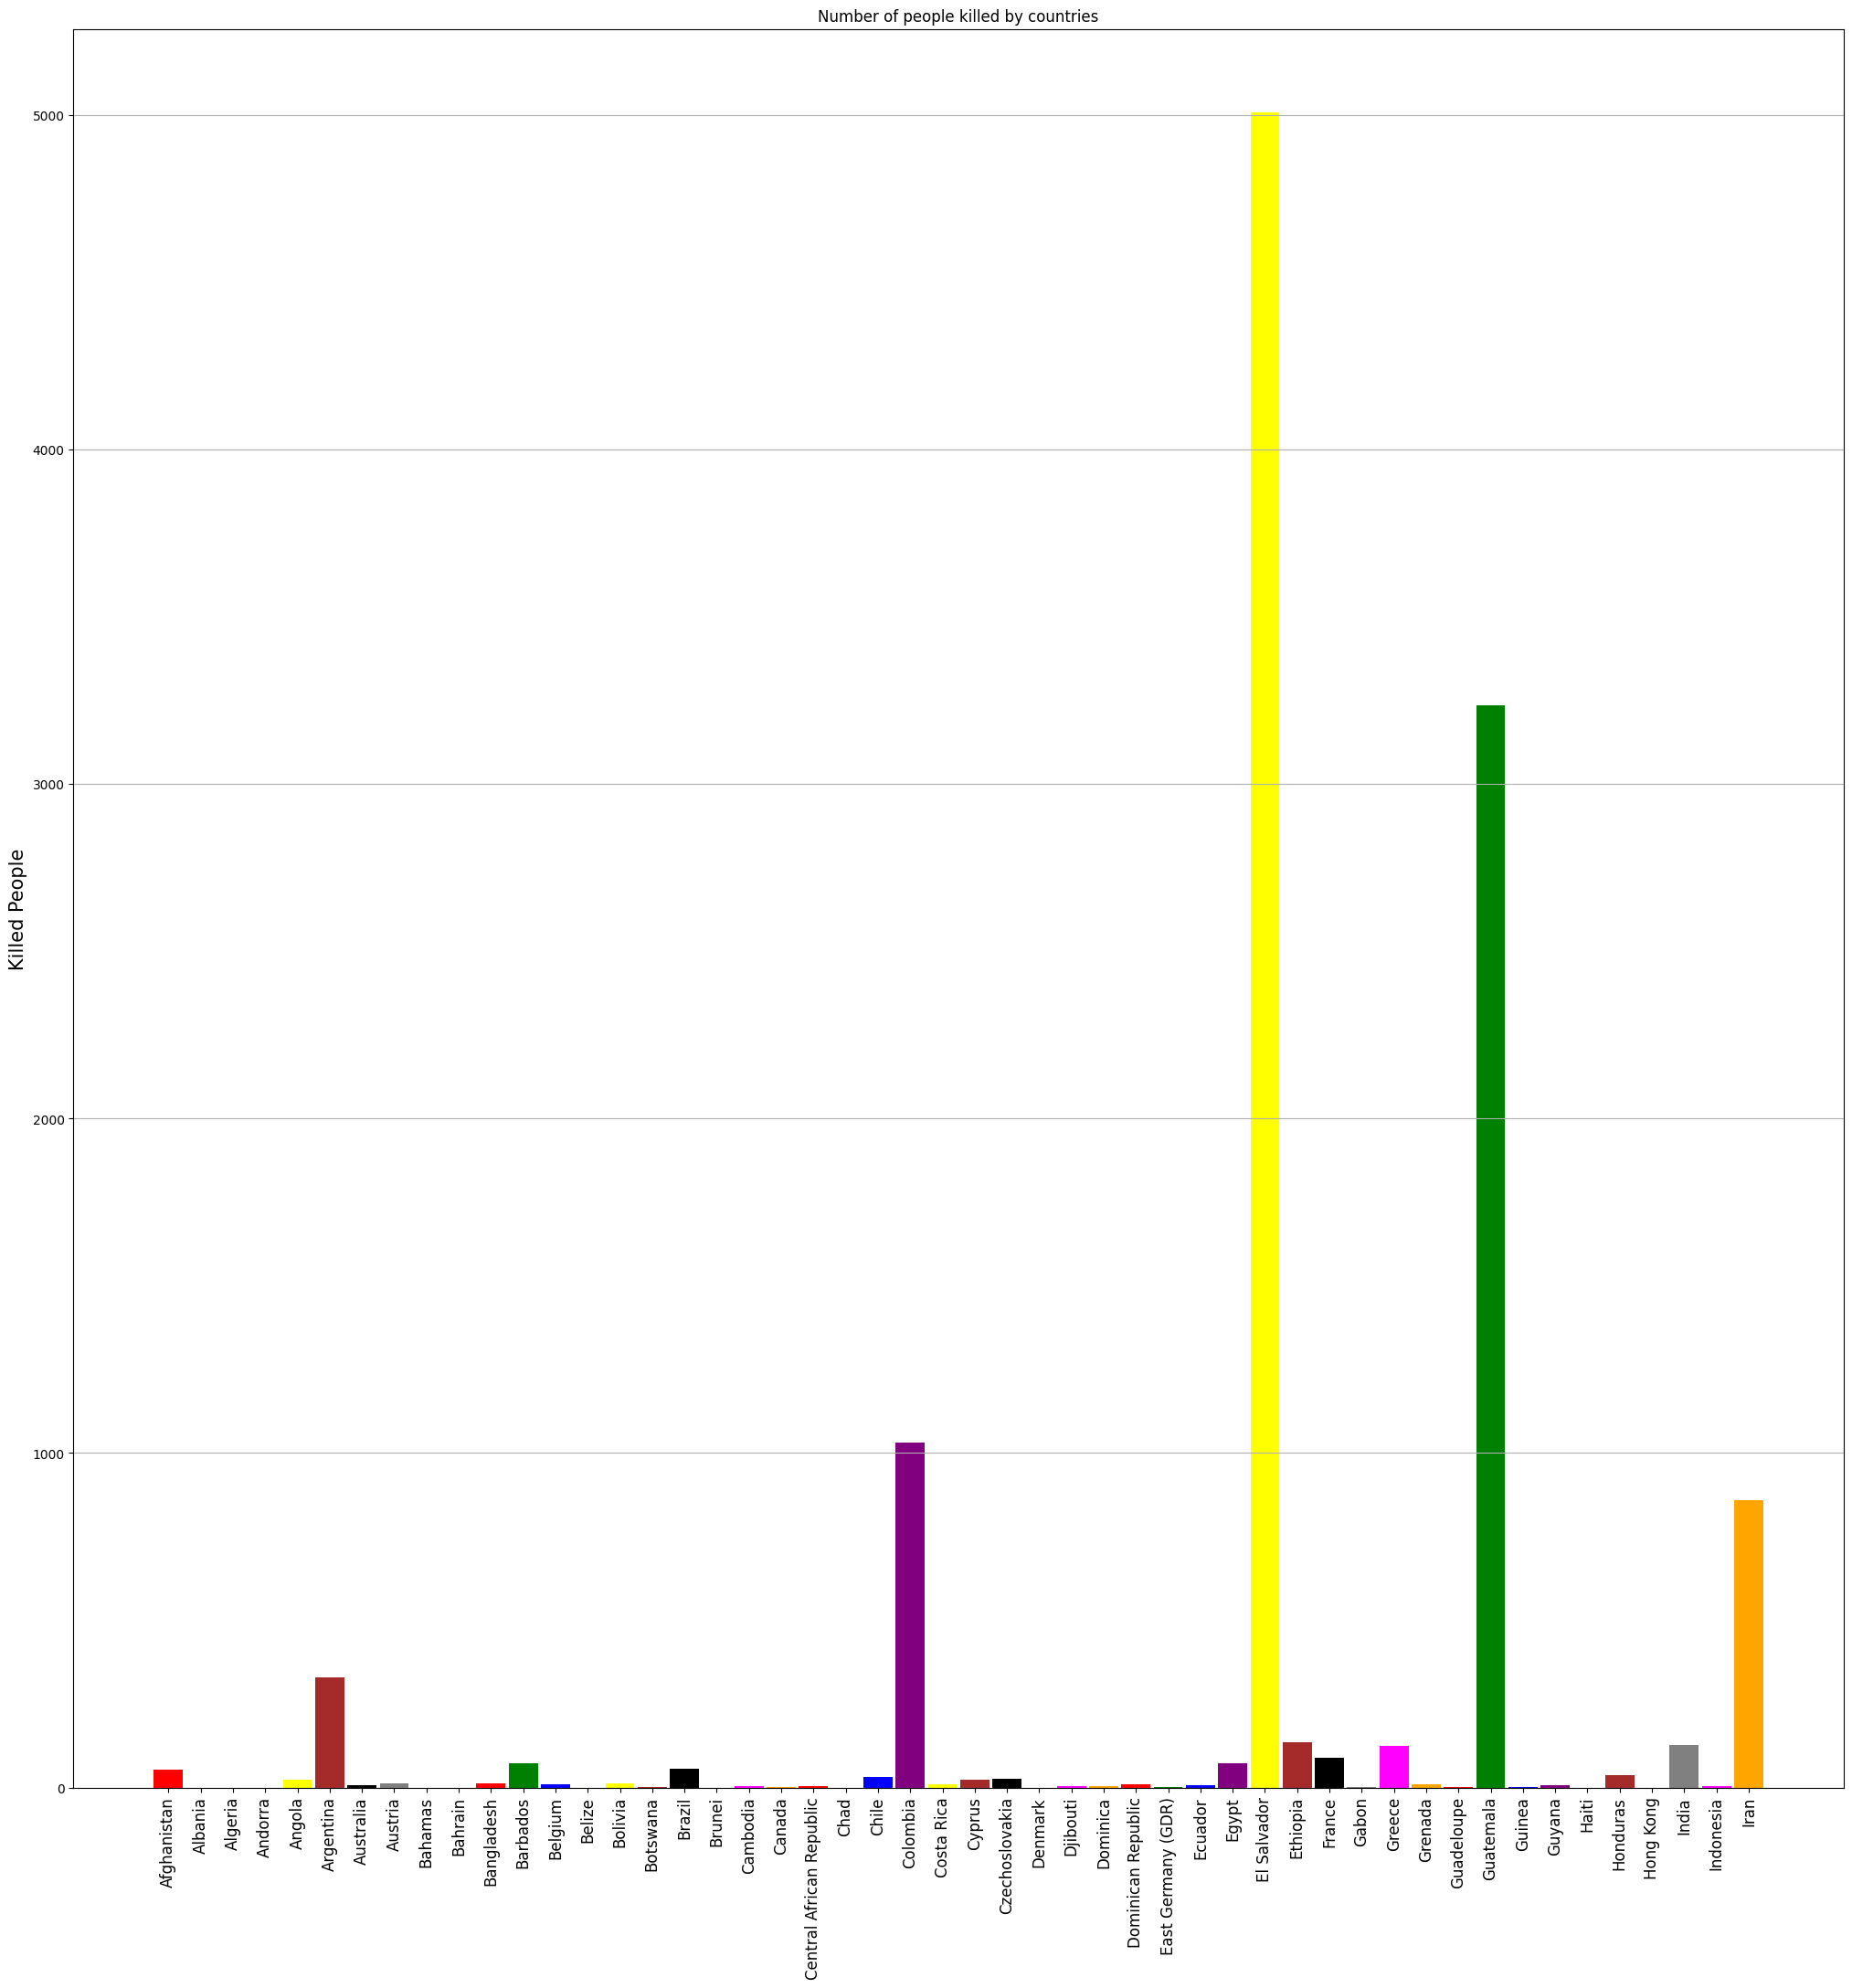

In [24]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

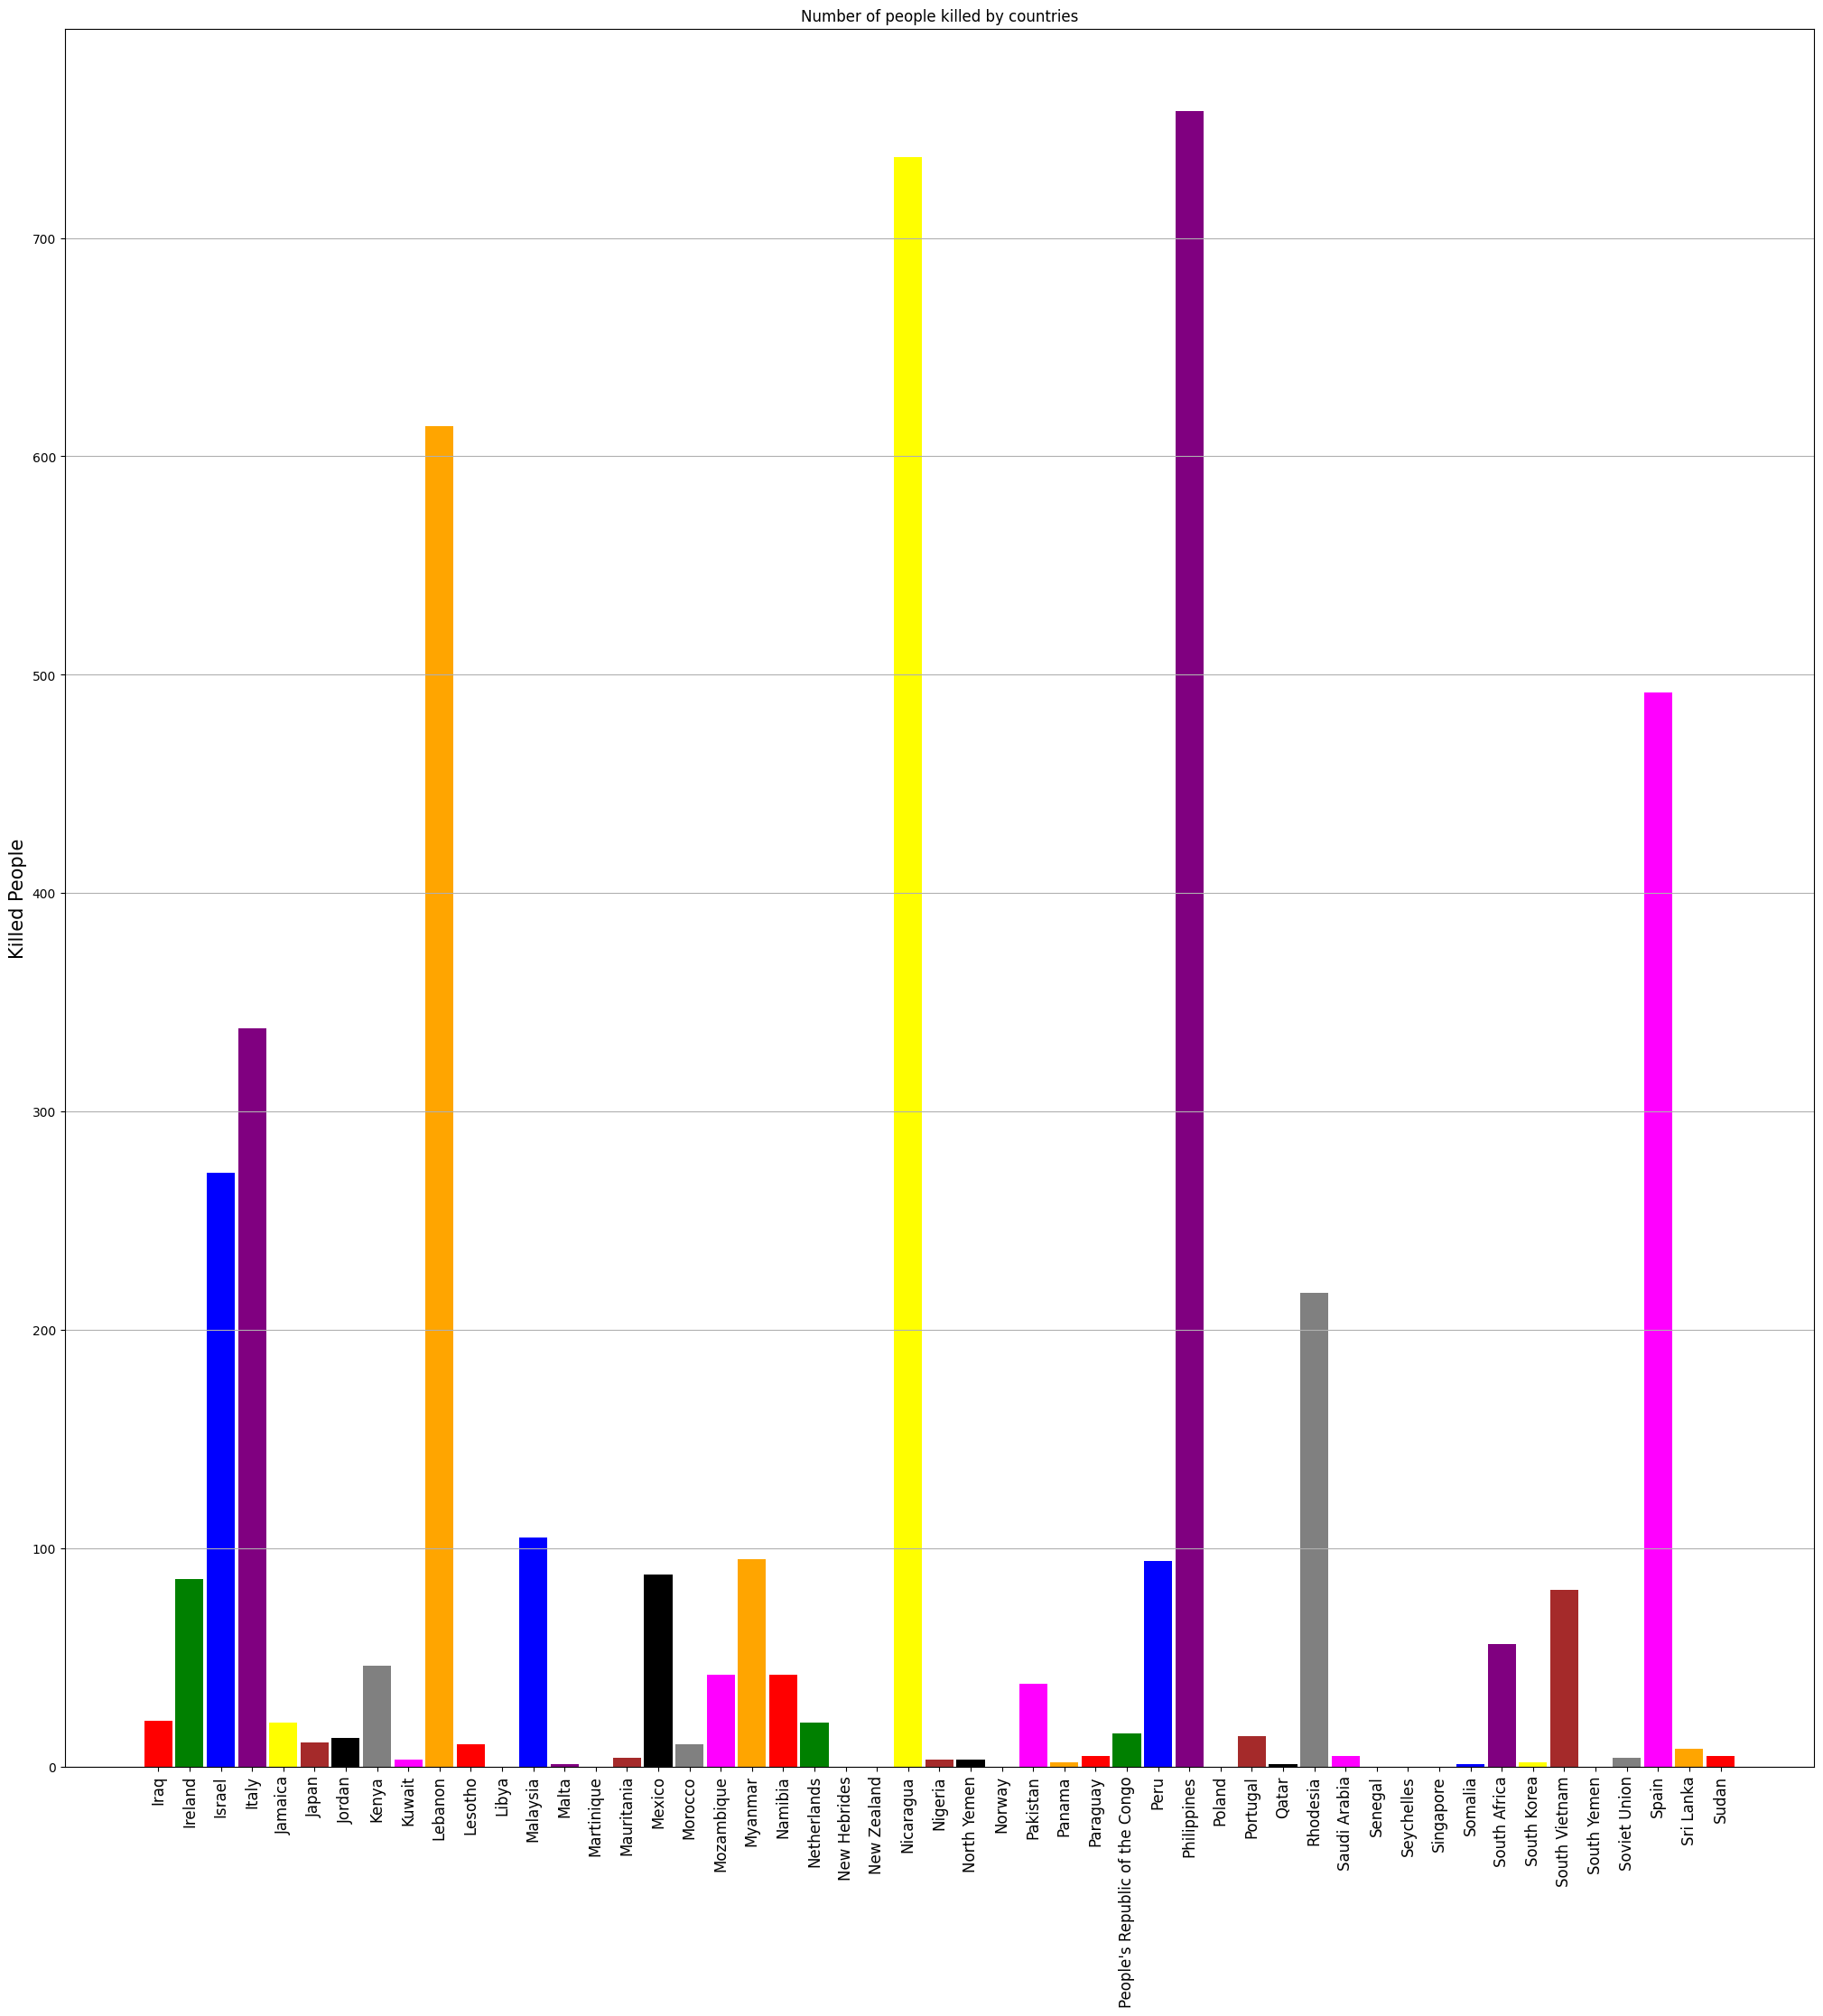

In [25]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()